In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
get_ipython().run_line_magic('matplotlib', 'inline')

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [7]:
initial_data = pd.read_csv(r'C:\Users\lenovo\Documents\IoT-Network-Intrusion-Detection-and-Classification-using-Explainable-XAI-Machine-Learning-main (1)\UNSW_NB15_training.csv')

In [8]:
initial_data.head(n=5)

dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0  0.000011      2      0     496       0   90909.0902   254     0   
1  0.000008      2      0    1762       0  125000.0003   254     0   
2  0.000005      2      0    1068       0  200000.0051   254     0   
3  0.000006      2      0     900       0  166666.6608   254     0   
4  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  dload  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0  180363632.0    0.0  ...                 1               2             0   
1  881000000.0    0.0  ...                 1               2             0   
2  854400000.0    0.0  ...                 1               3             0   
3  600000000.0    0.0  ...                 1               3             0   
4  850400000.0    0.0  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1           0                 0           1           2                0   
2           0                 0           1           3                0   
3           0                 0           2           3                0   
4           0                 0           2           3                0   

   attack_cat  label  
0      Normal      0  
1      Normal      0  
2      Normal      0  
3      Normal      0  
4      Normal      0  

[5 rows x 41 columns]

In [9]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   spkts              82332 non-null  int64  
 2   dpkts              82332 non-null  int64  
 3   sbytes             82332 non-null  int64  
 4   dbytes             82332 non-null  int64  
 5   rate               82332 non-null  float64
 6   sttl               82332 non-null  int64  
 7   dttl               82332 non-null  int64  
 8   sload              82332 non-null  float64
 9   dload              82332 non-null  float64
 10  sloss              82332 non-null  int64  
 11  dloss              82332 non-null  int64  
 12  sinpkt             82332 non-null  float64
 13  dinpkt             82332 non-null  float64
 14  sjit               82332 non-null  float64
 15  djit               82332 non-null  float64
 16  swin               823

In [10]:
initial_data.isnull().sum()

dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

In [11]:
data_to_use = initial_data.dropna()

In [12]:
data_to_use.shape

(82332, 41)

In [13]:
X = data_to_use.drop(axis=1, columns=['attack_cat'])
X = X.drop(axis=1, columns=['label'])
y1 = data_to_use['attack_cat'].values
y2 = data_to_use['label'].values

In [14]:
def data_ratio(y2):
    '''
    Calculate Y2's ratio
    '''
    unique, count = np.unique(y2, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

The class ratio for the original data: 1.2:1 (677/583)


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


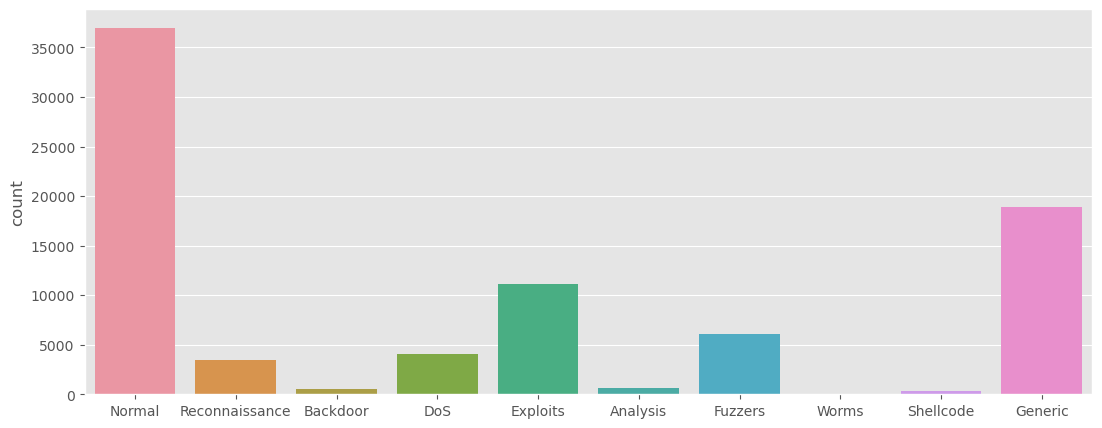

The class ratio for the original data: 0.8:1 (37000/45332)


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


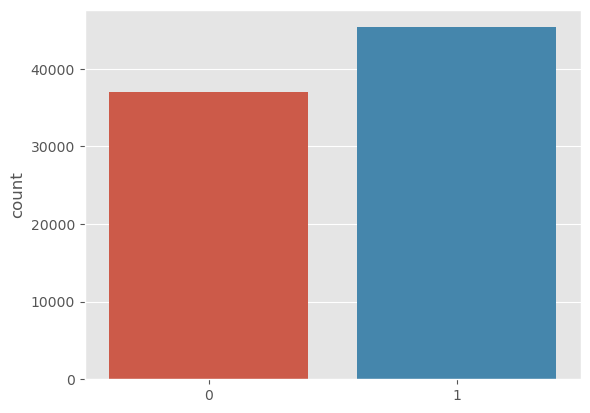

In [15]:
print('The class ratio for the original data:', data_ratio(y1))
plt.figure(figsize=(13,5))
sns.countplot(y1,label="Sum")
plt.show()
print('The class ratio for the original data:', data_ratio(y2))
sns.countplot(y2,label="Sum")
plt.show()

In [16]:
test_data = pd.read_csv(r'C:\Users\lenovo\Documents\IoT-Network-Intrusion-Detection-and-Classification-using-Explainable-XAI-Machine-Learning-main (1)\UNSW_NB15_testing-set.csv')
X_test = test_data.drop(axis=1, columns=['attack_cat'])
X_test = X_test.drop(axis=1, columns=['label'])

In [17]:
y1_test = test_data['attack_cat'].values
y2_test = test_data['label'].values

In [18]:
X_train = X
y1_train = y1
y2_train = y2

In [19]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [20]:
numerical_cols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [21]:
t = [('ohe', OneHotEncoder(drop='first'), categorical_cols),
    ('scale', StandardScaler(), numerical_cols)]
col_trans = ColumnTransformer(transformers=t)
col_trans.fit(X_train)

ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first'),
                                 Index([], dtype='object')),
                                ('scale', StandardScaler(),
                                 Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object'))])

In [22]:
X_train_transform = col_trans.transform(X_train)

In [23]:
X_test_transform = col_trans.transform(X_test)

In [24]:
X_train_transform.shape

(82332, 39)

In [25]:
X_test_transform.shape

(175341, 39)

In [26]:
pd.unique(y1)

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [27]:
pd.unique(y2)

array([0, 1], dtype=int64)

In [28]:
target_trans = LabelEncoder()
target_trans.fit(y1_train)

LabelEncoder()

In [29]:
y1_train_transform = target_trans.transform(y1_train)
y1_test_transform = target_trans.transform(y1_test)

In [30]:
y1_train_transform

array([6, 6, 6, ..., 6, 6, 6])

In [31]:
target_trans = LabelEncoder()
target_trans.fit(y2_train)
y2_train_transform = target_trans.transform(y2_train)
y2_test_transform = target_trans.transform(y2_test)

In [32]:
y2_train_transform

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
DTclf = tree.DecisionTreeClassifier()
DTclf.fit(X_train_transform, y2_train_transform)

DecisionTreeClassifier()

In [34]:
feature_names = np.array(numerical_cols)
feature_names

array(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt',
       'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'], dtype=object)

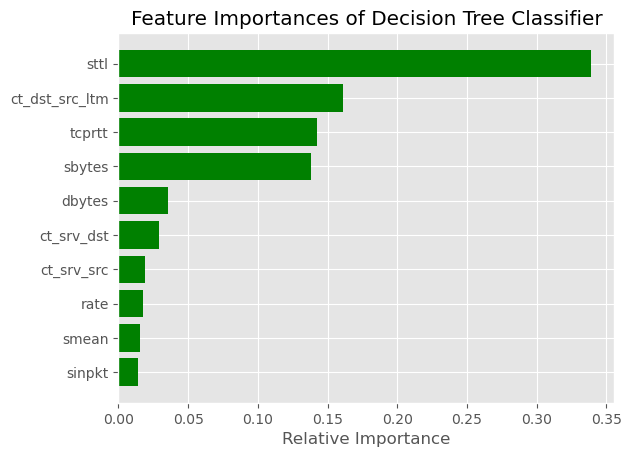

In [35]:
importances = DTclf.feature_importances_
indices = np.argsort(importances)
features = np.array(numerical_cols)
plt.title('Feature Importances of Decision Tree Classifier')
count = 10 # top # importance
plt.barh(range(count), importances[indices][len(indices)-count:], color='g', align='center')
plt.yticks(range(count), [features[i] for i in indices[len(indices)-count:]])
plt.xlabel('Relative Importance')
plt.show()

In [36]:
DTclf.feature_importances_

array([5.18290189e-03, 1.33227728e-03, 6.05818923e-04, 1.38019951e-01,
       3.58497644e-02, 1.75617849e-02, 3.38916884e-01, 0.00000000e+00,
       5.95820534e-03, 6.46070592e-03, 1.56556530e-03, 4.25648798e-04,
       1.39073315e-02, 4.09764703e-03, 2.62839901e-03, 3.18458489e-03,
       0.00000000e+00, 4.29819401e-03, 4.47279582e-03, 0.00000000e+00,
       1.42200536e-01, 5.90285930e-03, 4.52541999e-03, 1.51790805e-02,
       4.20339834e-03, 1.15939550e-03, 4.04111590e-03, 1.88046532e-02,
       2.69888514e-04, 8.18713957e-03, 6.64281543e-03, 6.17637091e-03,
       1.60766795e-01, 0.00000000e+00, 2.33872447e-05, 2.70614370e-03,
       5.47840051e-03, 2.92641404e-02, 0.00000000e+00])

In [37]:
!pip install eli5

In [38]:
DTclf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
DTclf = DTclf.fit(X_train_transform, y2_train_transform)
y_pred = DTclf.predict(X_test_transform)

In [39]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test_transform, y_pred))
report=metrics.classification_report(y2_test_transform,y_pred)
DTclf_name=['Decision Tree Classifer','RegLog']
print('Reporting for %s:'%DTclf_name)
print(report)

Accuracy: 0.8517688390051386
Reporting for ['Decision Tree Classifer', 'RegLog']:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81     56000
           1       0.99      0.79      0.88    119341

    accuracy                           0.85    175341
   macro avg       0.84      0.88      0.84    175341
weighted avg       0.89      0.85      0.86    175341



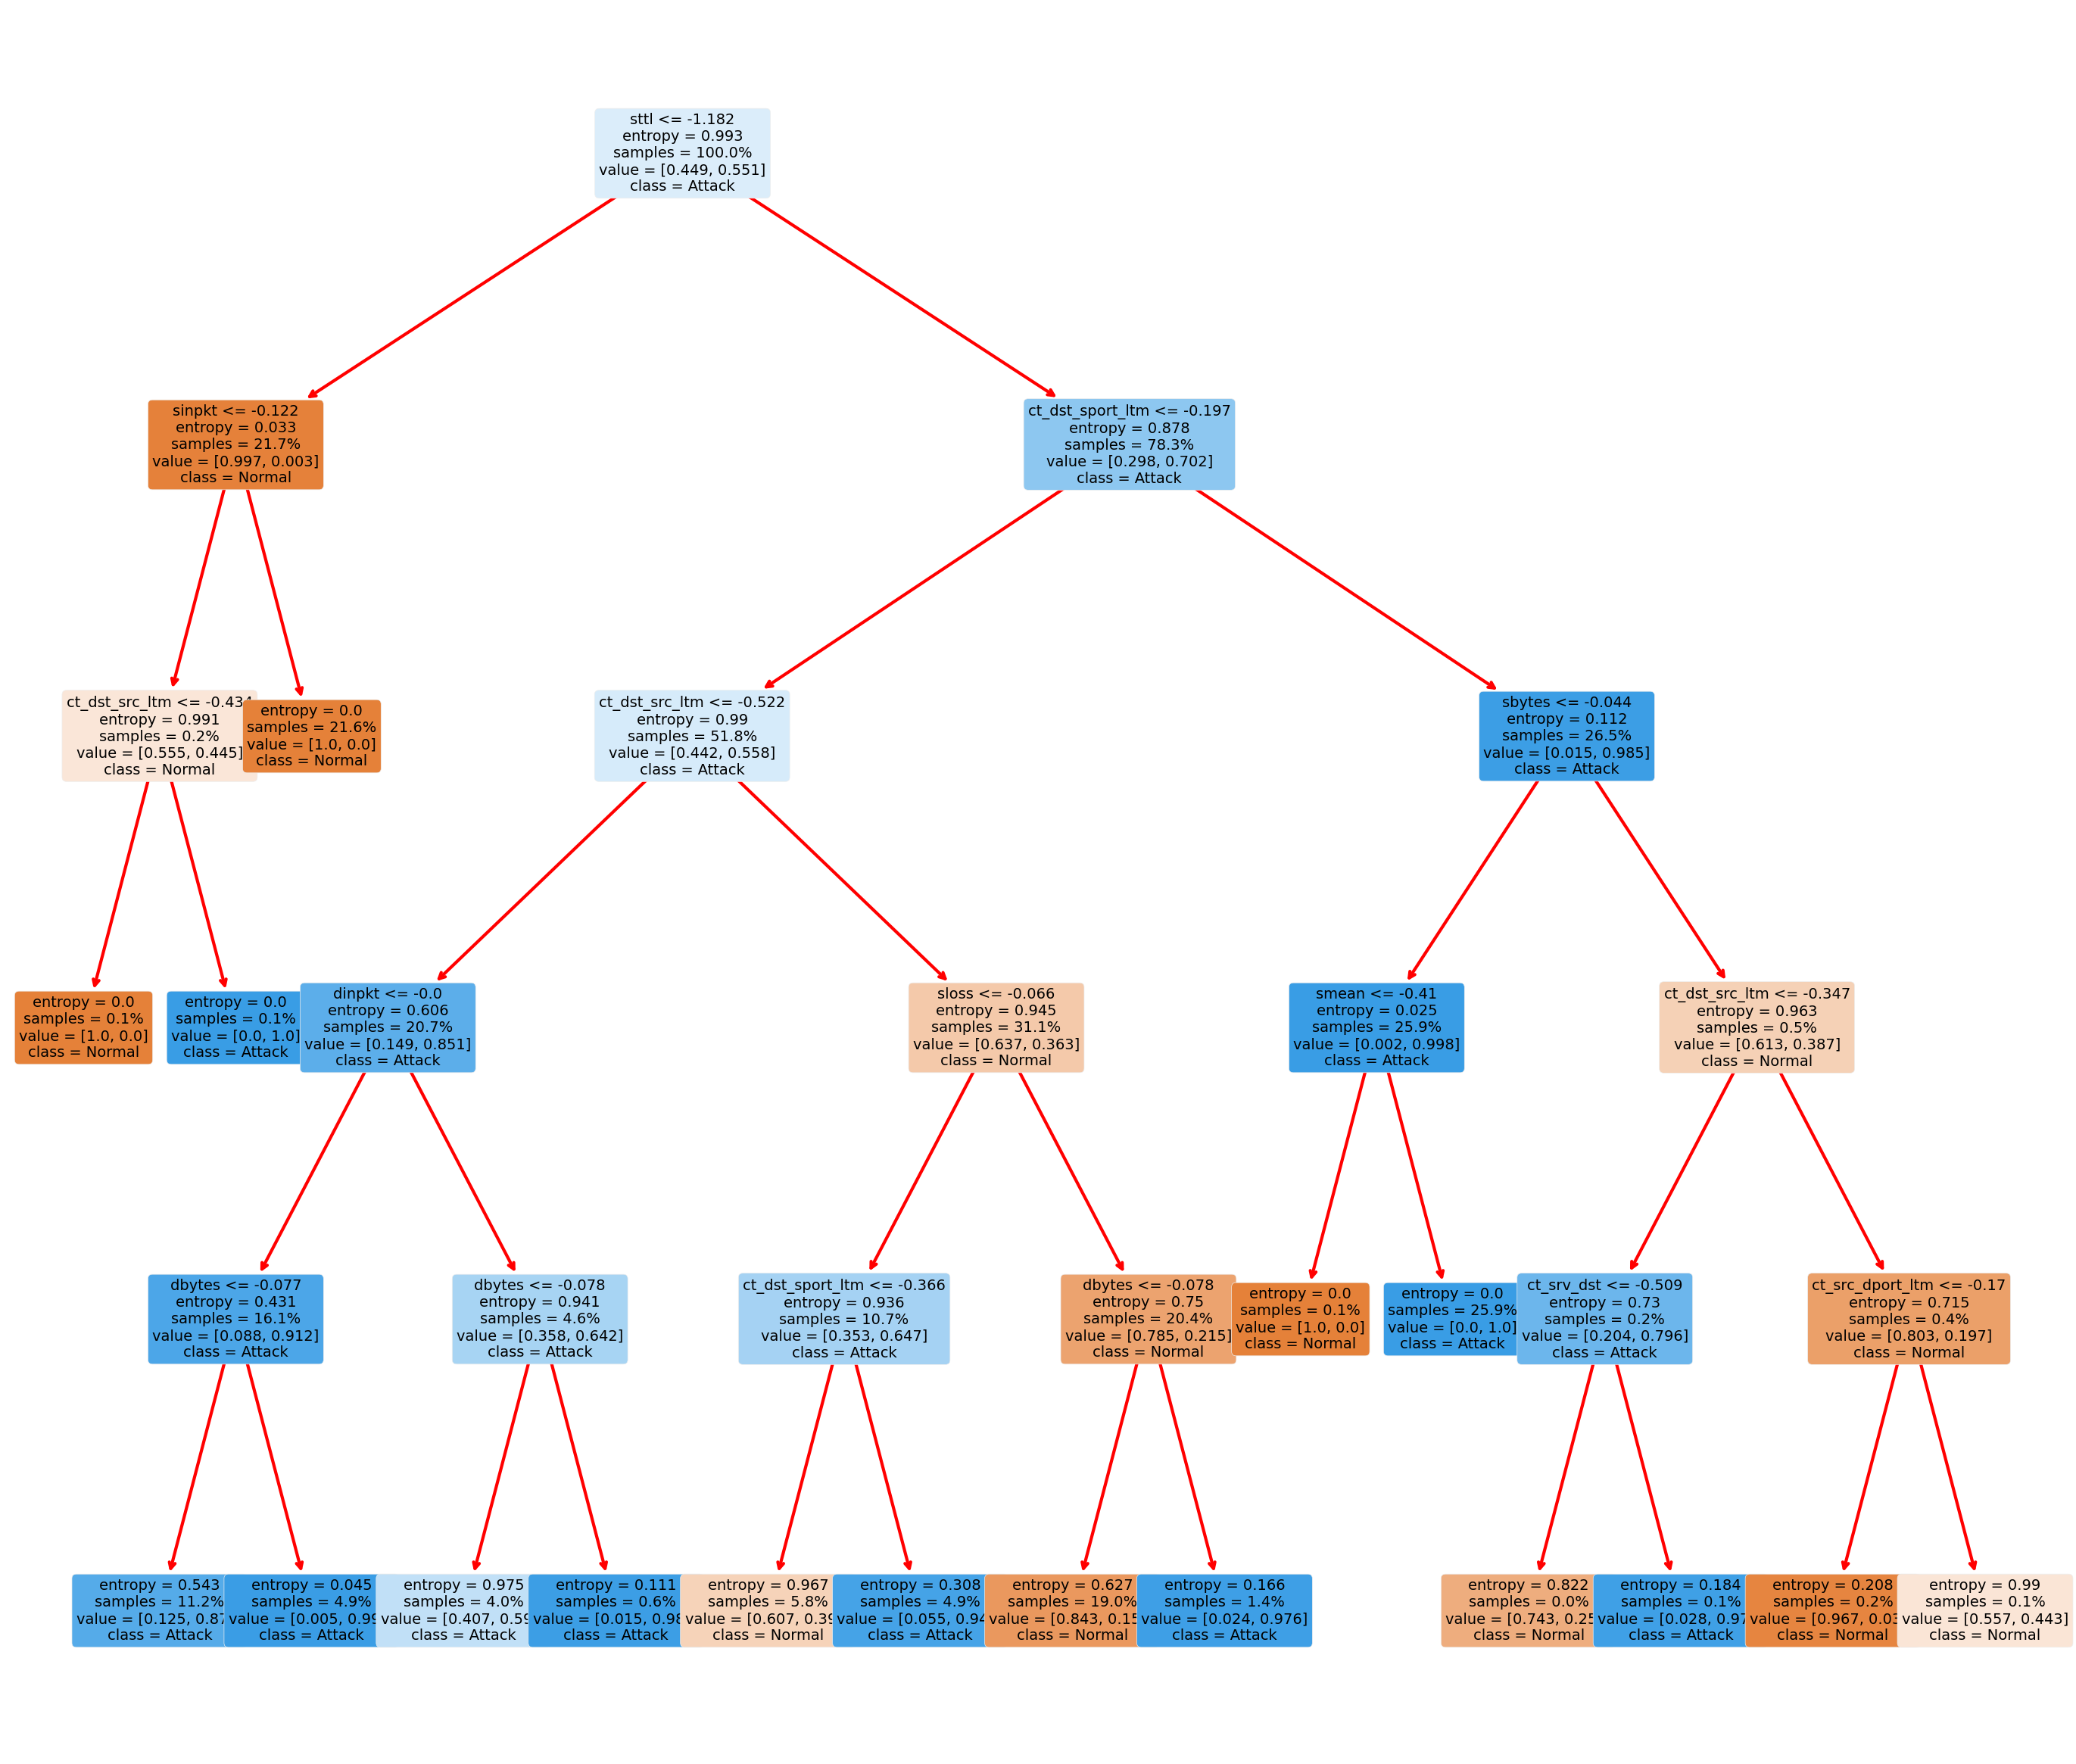

In [40]:
fig = plt.figure(figsize=(35, 30))
DTtree = tree.plot_tree(DTclf, feature_names = np.array(numerical_cols), class_names = ['Normal', 'Attack'], fontsize=14, proportion=True, filled=True, rounded=True)
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier XAI Visualization Part 2.png')

In [41]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(DTclf, random_state=1).fit(X_test_transform, y2_test_transform)
eli5.show_weights(perm, feature_names = np.array(numerical_cols))

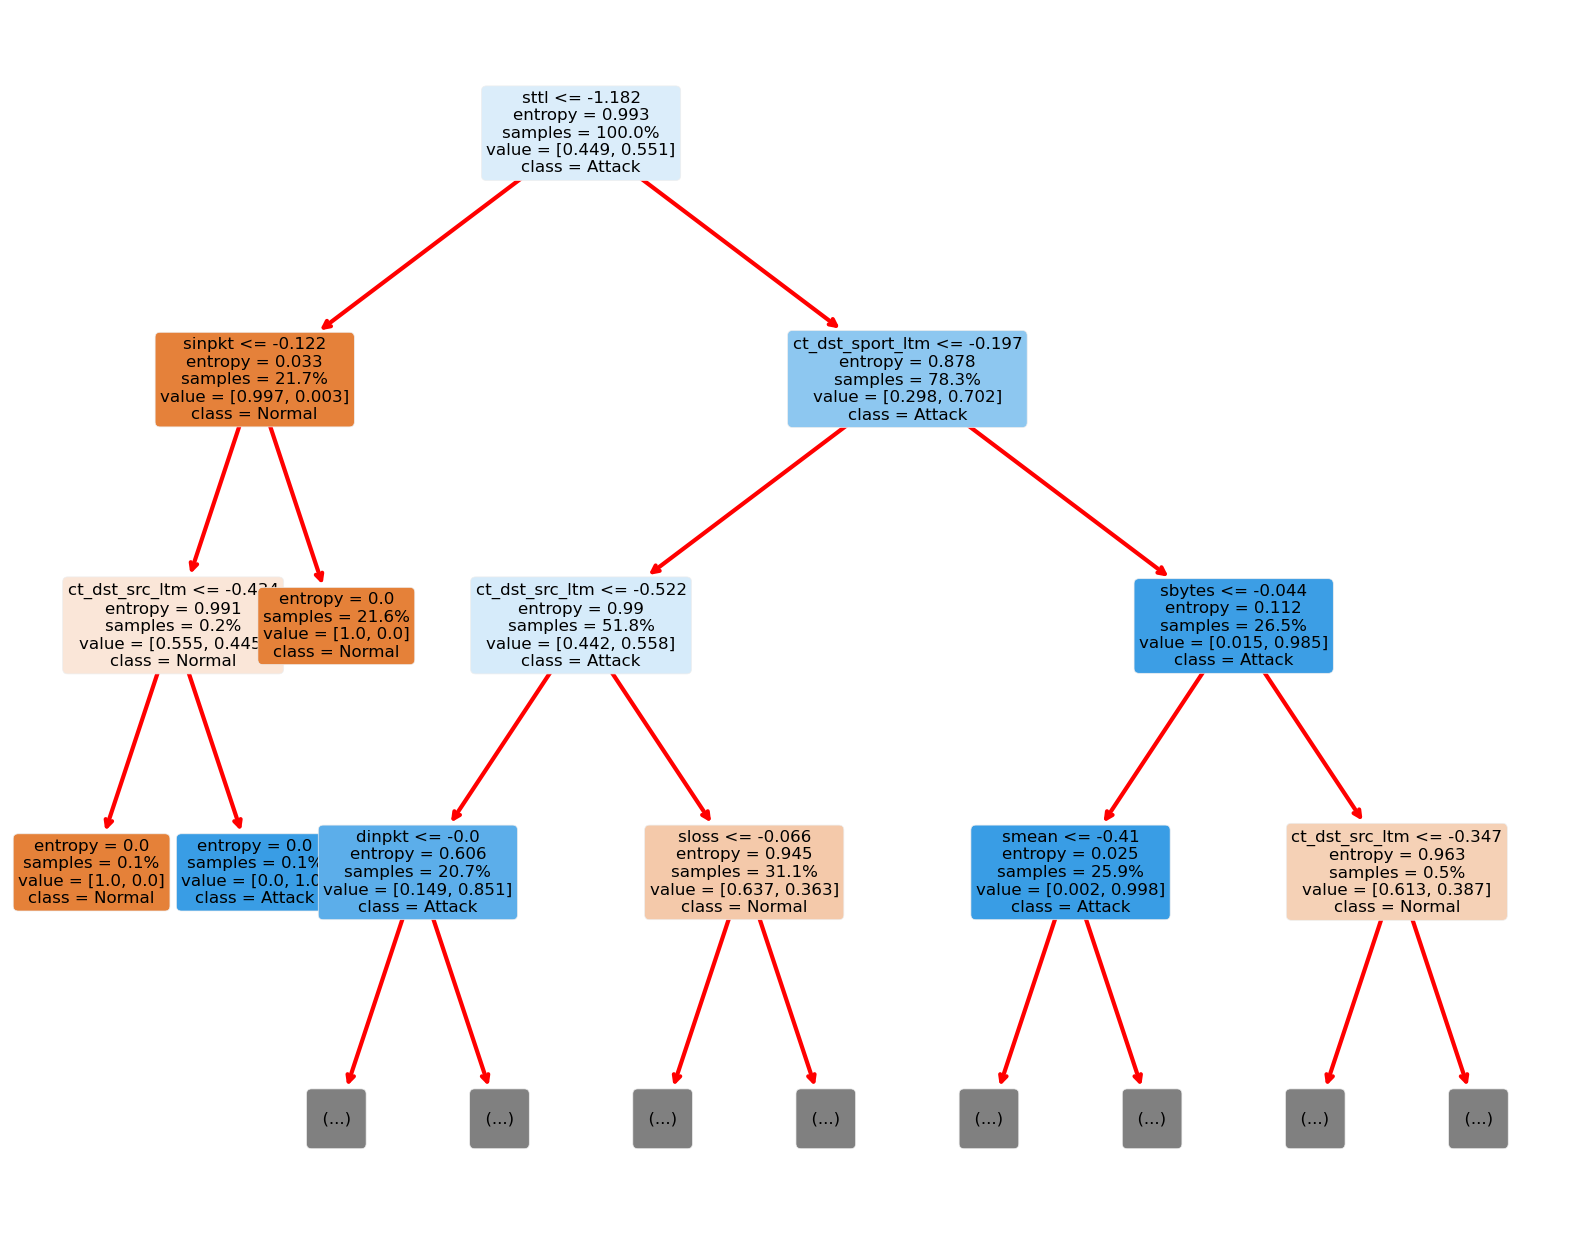

In [42]:
fig = plt.figure(figsize=(20, 16))
DTtree = tree.plot_tree(DTclf, feature_names = features, class_names = ['Normal', 'Attack'], fontsize=12, proportion=True, filled=True, rounded=True, max_depth=3) 
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)
fig.savefig('Decision Tree Classifier (Depth = 3 Nodes) Explainable AI Visualization.png')

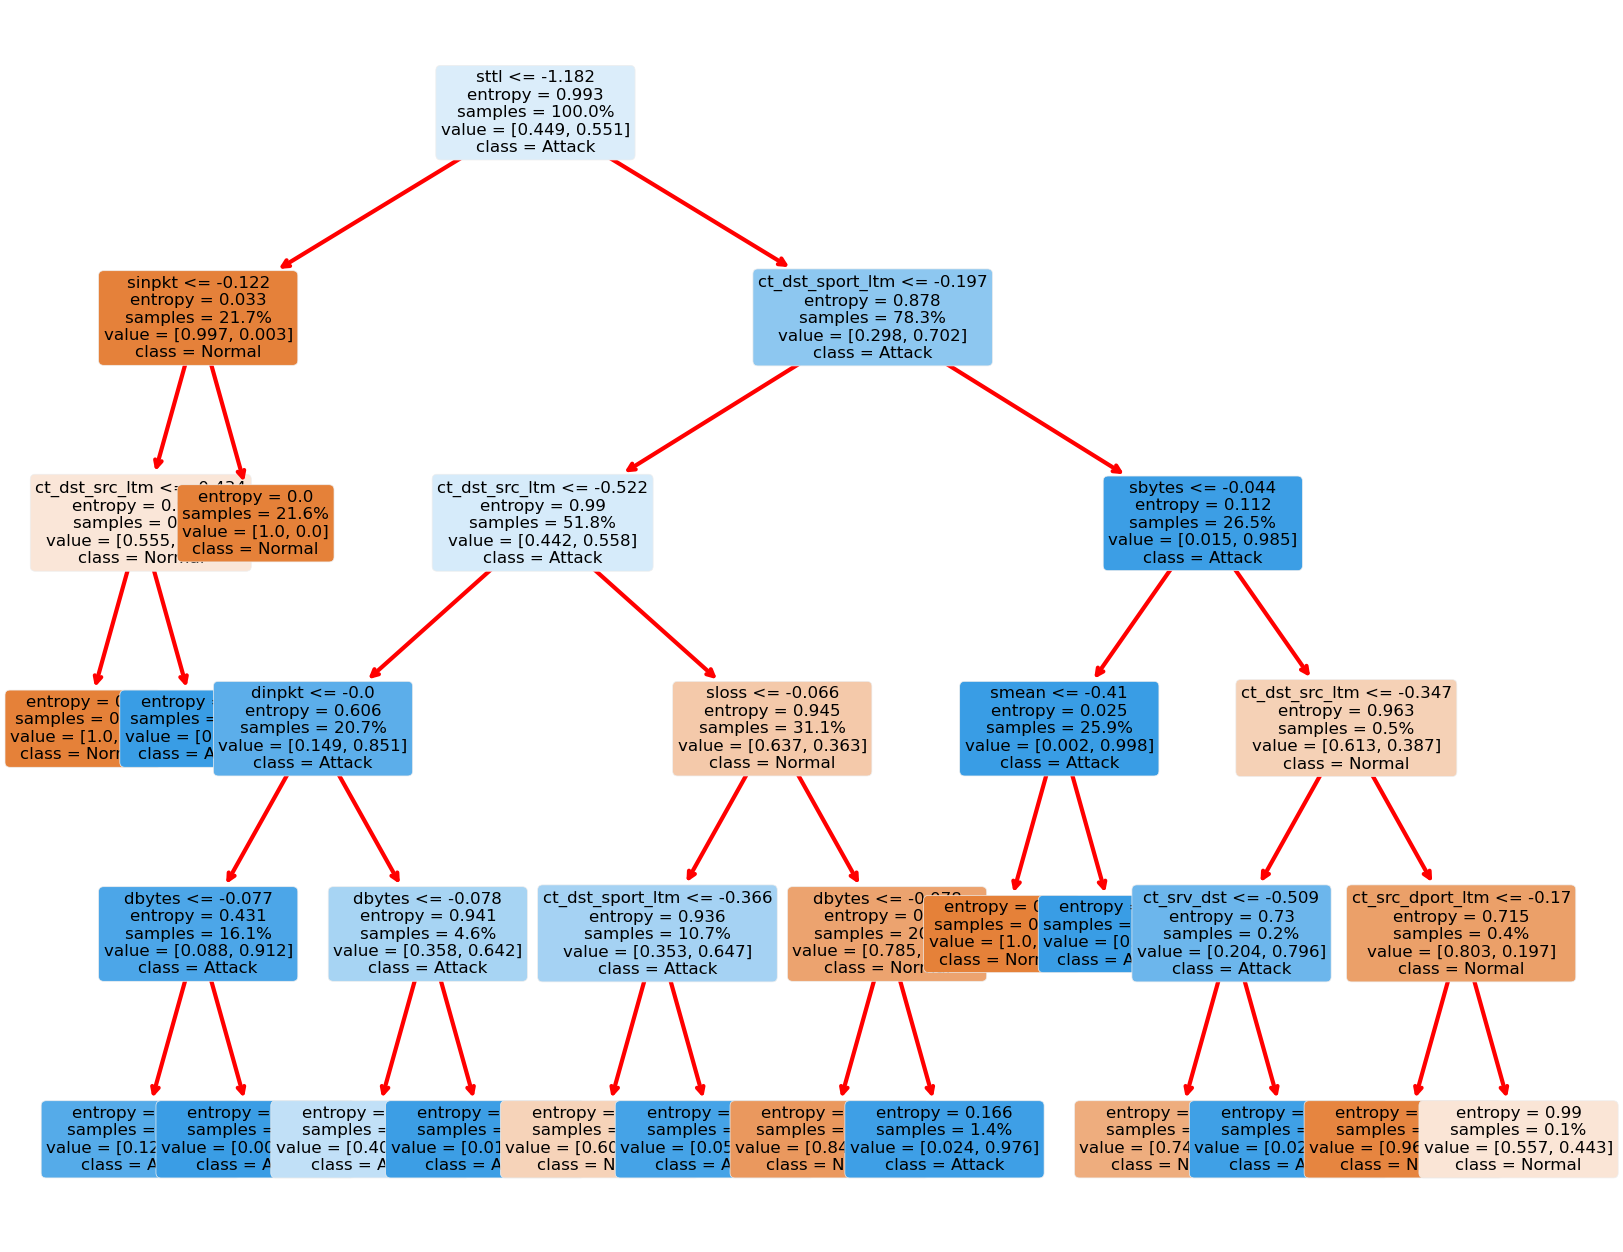

In [43]:
fig = plt.figure(figsize=(20, 16))
DTtree = tree.plot_tree(DTclf, feature_names = features, class_names = ['Normal', 'Attack'], fontsize=12, proportion=True, filled=True, rounded=True, max_depth=5) 
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)
fig.savefig('Decision Tree Classifier (Depth = 5 Nodes) Explainable AI Visualization.png')

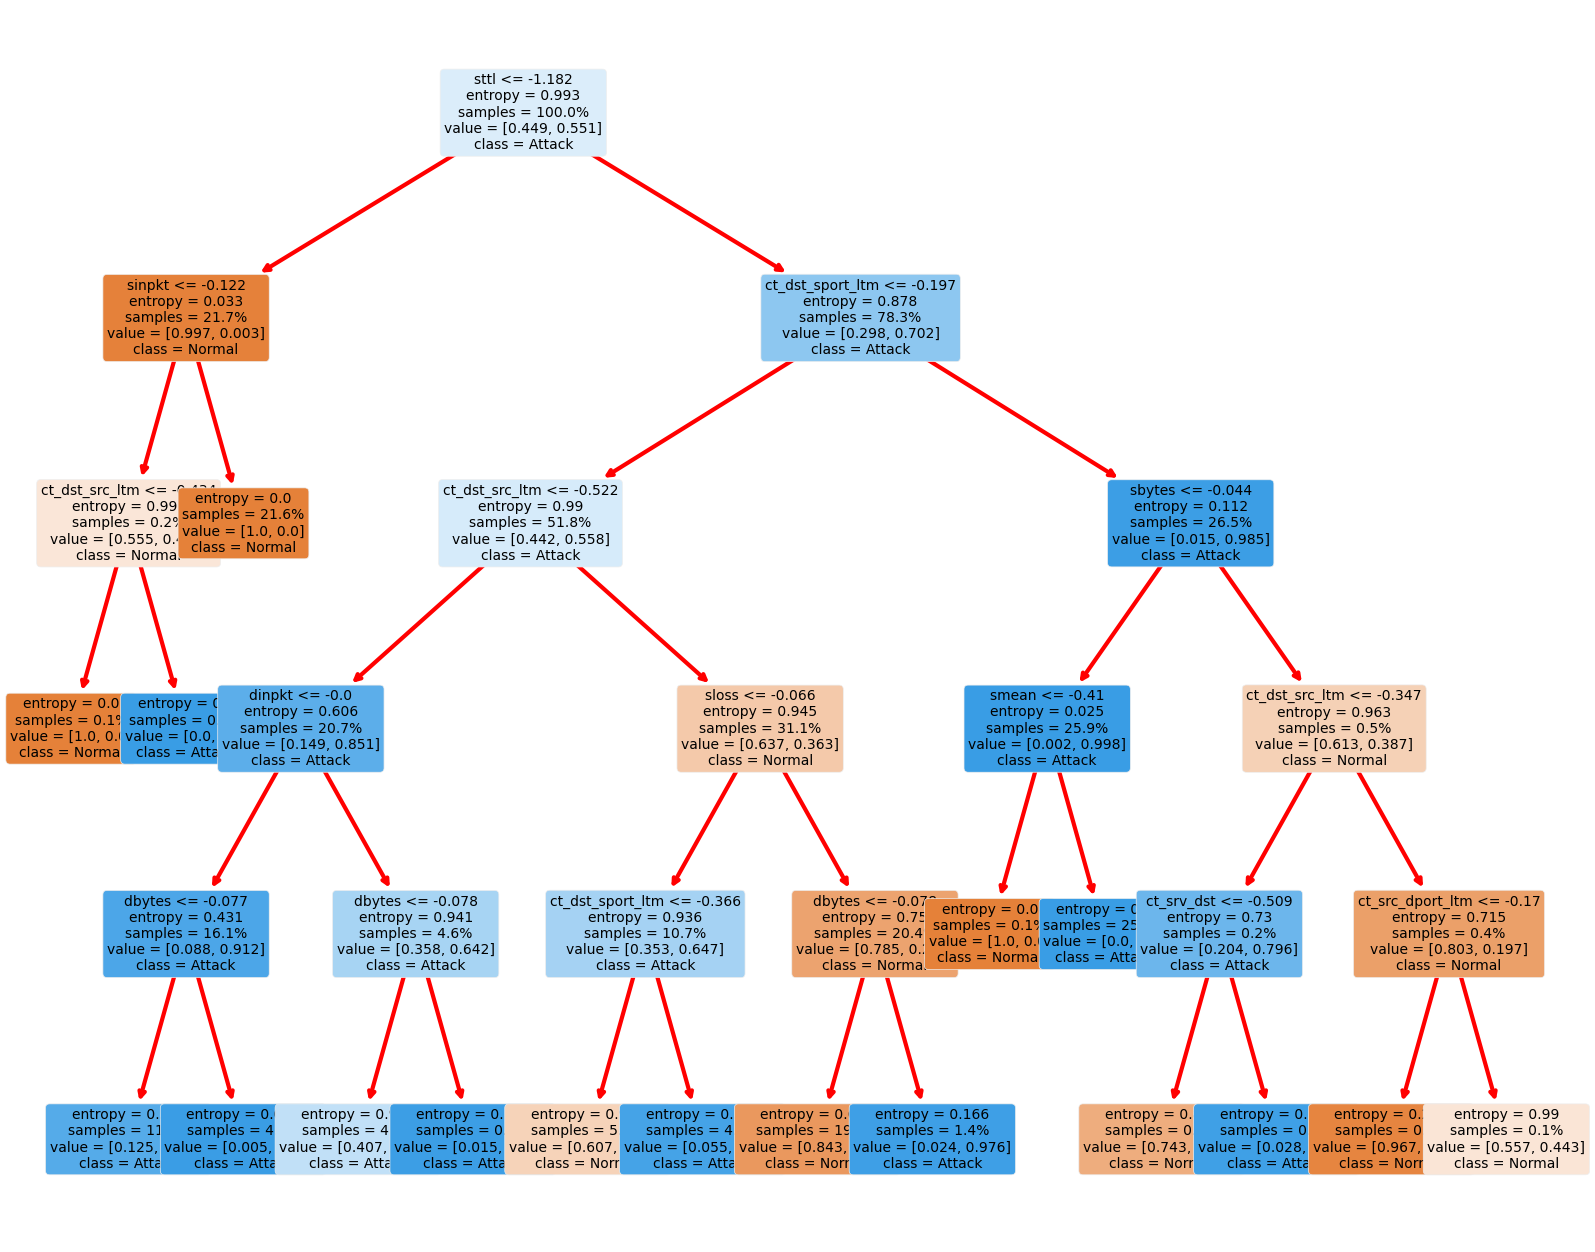

In [44]:
fig = plt.figure(figsize=(20, 16))
DTtree = tree.plot_tree(DTclf, feature_names = features, class_names = ['Normal', 'Attack'], fontsize=10, proportion=True, filled=True, rounded=True, max_depth=8) 
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)
fig.savefig('Decision Tree Classifier (Depth = 8 Nodes) Explainable AI Visualization.png')

In [45]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
DTclf = tree.DecisionTreeClassifier()
scoring = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro', 'roc_auc_ovr']  
cv_results = cross_validate(estimator=DTclf,
                            X=X_train_transform,
                            y=y2_train_transform,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False)

In [46]:
cv_results

{'fit_time': array([1.32348442, 1.09148073, 1.21955752, 1.17672944, 1.05361009]),
 'score_time': array([0.0339818 , 0.03098178, 0.02998328, 0.03897524, 0.02993608]),
 'test_accuracy': array([0.96417077, 0.96793587, 0.96447225, 0.96653711, 0.96592979]),
 'test_precision_micro': array([0.96417077, 0.96793587, 0.96447225, 0.96653711, 0.96592979]),
 'test_recall_micro': array([0.96417077, 0.96793587, 0.96447225, 0.96653711, 0.96592979]),
 'test_f1_micro': array([0.96417077, 0.96793587, 0.96447225, 0.96653711, 0.96592979]),
 'test_roc_auc_ovr': array([0.96375009, 0.96746157, 0.96376333, 0.96620756, 0.96578228])}

In [47]:
cv_results['test_accuracy'].mean()

0.9658091569702719

In [48]:
DTclf.fit(X=X_train_transform, y=y2_train_transform)
y_pred_class = DTclf.predict(X=X_test_transform)
y_pred_score = DTclf.predict_proba(X=X_test_transform)[:, 1]
auc_ontest = roc_auc_score(y_true=y2_test_transform, y_score=y_pred_score)
cm_ontest = confusion_matrix(y_true=y2_test_transform, y_pred=y_pred_class)
precision_ontest = precision_score(y_true=y2_test_transform, y_pred=y_pred_class)
recall_ontest = recall_score(y_true=y2_test_transform, y_pred=y_pred_class)
cls_report_ontest = classification_report(y_true=y2_test_transform, y_pred=y_pred_class)
print('The model scores {:1.5f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.5f}'.format(precision_ontest))
print('The recall score on the test set: {:1.5f}'.format(recall_ontest))
print('Confusion Matrix:\n', cm_ontest)
print('Classification Report:\n', cls_report_ontest)

The model scores 0.90941 ROC AUC on the test set.
The precision score on the test set: 0.97964
The recall score on the test set: 0.85670
Confusion Matrix:
 [[ 53875   2125]
 [ 17102 102239]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85     56000
           1       0.98      0.86      0.91    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.91      0.88    175341
weighted avg       0.91      0.89      0.89    175341



In [49]:
!pip install sklearn

In [50]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [51]:
!pip install lime

In [52]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [53]:
!pip install xgboost

In [54]:
import xgboost
gbtree = xgboost.XGBClassifier(n_estimators=300, max_depth=5)
gbtree.fit(X_train_transform, y2_train_transform)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [55]:
metrics.accuracy_score(y2_test_transform, gbtree.predict(X_test_transform))

0.8987800913648263

In [56]:
predict_fn = lambda x: gbtree.predict_proba(x).astype(float)

In [57]:
features = np.array(numerical_cols)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_transform ,feature_names = features, class_names = ['Normal', 'Attack'], kernel_width=3)

In [58]:
np.random.seed(1)
i = 1653
exp = explainer.explain_instance(X_test_transform[i], predict_fn, num_features=5)
exp.show_in_notebook(show_all=False)

In [59]:
i = 10
exp = explainer.explain_instance(X_test_transform[i], predict_fn, num_features=5)
exp.show_in_notebook(show_all=False)